# ADA - project
# Scala MOOC - Extraction of Learning Patterns

## Introduction

### Project description

bla bla bla

### Dataset description
- Forum Events
    * field1...
    * field2...
- Problem Events
- Video Events
- metadata

### Team
- Victor
- Thibault
- Louis

### Summary

## Libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Configuration

In [2]:
config = {
    'courseName': 'progfun-002',
}

## Data imports

### User Grades

In [3]:
df_User_Grades = pd.read_csv('data/' + config['courseName'] + '_User_Grades.csv')
df_User_Grades = df_User_Grades[['SessionUserID','Grade','AchievementLevel']]
df_User_Grades.head()

,SessionUserID,Grade,AchievementLevel
0,8accc2f206303b9d17a053ad7baf1dfda43106d7,0.0,Failed
1,72c928d78974d421ad926437dd7bfeb77df025d3,0.0,Failed
2,7b739a27ae755435d5be8b0d6cc2acfa9825b673,0.0,Failed
3,defb225fb299fb0365383acc90defd55b2fe3220,0.0,Failed
4,2f738f48b9e1d5b7d2ea95529026b8c4d9543fdd,0.0,Failed


### Assignment Events

In [4]:
df_Problem_Event = pd.read_csv(
    'data/' + config['courseName'] + '_Problem_Events_with_Info.csv',
    dtype={"Grade":np.float64},
    na_values=['None']
)
df_Problem_Event.head(1)

,EventID,ForumUserID,MaximumSubmissions,AccountUserID,SubmissionNumber,Grade,TimeStamp,DataPackageID,ProblemID,SoftCloseTime,ProblemType,HardCloseTime,Platform,OpenTime,EventType,Title,SessionUserID,UniqueProblemID,UniqueUserID
0,3bcd1a54ed6ddb04b4a6fb2906110a01,NaN,0.0,NaN,7,NaN,1365344171,progfun-002,7,2.147484e+09,Video,2.147484e+09,Coursera,32400.0,Problem.Check,Lecture 1.2 - Elements of Programming (14:25),c4d4e5fcd2feba9f3234ee8d852dc7b22fbc07e4,f322944718b2ee0e53292118111533c7,21f13b3f6b50a83343b57d2f1d07dbdf


In [5]:
df_Problem_Event = df_Problem_Event[['SessionUserID','Grade','TimeStamp','ProblemID','ProblemType','EventType']]
print(df_Problem_Event.shape)
df_Problem_Event.head()

(458888, 6)


,SessionUserID,Grade,TimeStamp,ProblemID,ProblemType,EventType
0,c4d4e5fcd2feba9f3234ee8d852dc7b22fbc07e4,NaN,1365344171,7,Video,Problem.Check
1,5c353bfbd5ef50936ba7bbefd669d68251022676,NaN,1365047925,42,Video,Problem.Check
2,c6883c5b19d059835444a74ae215e7127c1ae479,NaN,1368278256,128,Video,Problem.Check
3,17f04d65c333476dee4a60960423e124ee58958b,NaN,1364834321,50,Video,Problem.Check
4,c3c061e8838f096ad41555d81b6e0c82aa649a83,NaN,1367047633,78,Video,Problem.Check


In [6]:
df_Assignment_Event = df_Problem_Event[df_Problem_Event.ProblemType == "Assignment"].dropna()
print(df_Assignment_Event.shape)
df_Assignment_Event.drop('ProblemType',axis=1,inplace=True)
df_Assignment_Event.head()

(105136, 6)


,SessionUserID,Grade,TimeStamp,ProblemID,EventType
353612,d8f79efa32a560b8a46ea2b12d9bed97c9e39b4b,9.33,1366220878,6,Problem.Check
353613,01f3f5e9d74af6db74312f8732c5b7537d85a1f7,9.96,1368387177,17,Problem.Check
353614,c188ee041432748b84cb2cea79157149bcfd3839,9.58,1365562650,7,Problem.Check
353615,32990542ac561fc903f1d21f5261b8fd23d0b377,9.90,1367583295,12,Problem.Check
353616,87c90d3a59f52681f14f258687d83fbc6299cd40,10.00,1365720098,6,Problem.Check


In [7]:
df_Assignment_Event['Date'] = pd.to_datetime(df_Assignment_Event.TimeStamp,unit='s')
df_Assignment_Event.head()

,SessionUserID,Grade,TimeStamp,ProblemID,EventType,Date
353612,d8f79efa32a560b8a46ea2b12d9bed97c9e39b4b,9.33,1366220878,6,Problem.Check,2013-04-17 17:47:58
353613,01f3f5e9d74af6db74312f8732c5b7537d85a1f7,9.96,1368387177,17,Problem.Check,2013-05-12 19:32:57
353614,c188ee041432748b84cb2cea79157149bcfd3839,9.58,1365562650,7,Problem.Check,2013-04-10 02:57:30
353615,32990542ac561fc903f1d21f5261b8fd23d0b377,9.90,1367583295,12,Problem.Check,2013-05-03 12:14:55
353616,87c90d3a59f52681f14f258687d83fbc6299cd40,10.00,1365720098,6,Problem.Check,2013-04-11 22:41:38


### Video Events

In [8]:
df_Video_Event = pd.read_csv(
    'data/' + config['courseName'] + '_Video_Events.csv',
    na_values=['None']
)
df_Video_Event.head(1)

,EventID,ForumUserID,OldTime,AccountUserID,CurrentTime,SeekType,TimeStamp,DataPackageID,UniqueRowID,TableName,VideoID,Platform,NewSpeed,EventSource,EventType,SessionUserID,NewTime,OldSpeed
0,db75adce6b87e7ab79242ea0af4b82d4,NaN,154.696,NaN,154.697,NaN,1372391638,progfun-002,00000078c0f0685cc50a25a8d5734a88,Video_Events,33,coursera,1.0,NaN,Video.Play,ef64fb7b096008f7eaf8441684afdf99af9af54a,NaN,1.0


In [9]:
df_Video_Event = df_Video_Event[['SessionUserID','TimeStamp','VideoID','EventType']]
print(df_Video_Event.shape)
df_Video_Event.head()

(3471666, 4)


,SessionUserID,TimeStamp,VideoID,EventType
0,ef64fb7b096008f7eaf8441684afdf99af9af54a,1372391638,33,Video.Play
1,8d7c72c0dfe78d0dbeb187c6c46433b98c29f8bd,1366535543,39,Video.Load
2,21c300207e2c2f96974ebf8fc884ab299358edd8,1364980846,43,Video.Load
3,1d1f5d0168025bb6bfcde2ff88594d4c953090d2,1368938163,41,Video.Load
4,e60732a3364a4f3033f122d6bc50d385998ce0e4,1364379880,8,Video.Pause


In [10]:
df_Video_Event['Date'] = pd.to_datetime(df_Video_Event.TimeStamp,unit='s')
df_Video_Event.head()

,SessionUserID,TimeStamp,VideoID,EventType,Date
0,ef64fb7b096008f7eaf8441684afdf99af9af54a,1372391638,33,Video.Play,2013-06-28 03:53:58
1,8d7c72c0dfe78d0dbeb187c6c46433b98c29f8bd,1366535543,39,Video.Load,2013-04-21 09:12:23
2,21c300207e2c2f96974ebf8fc884ab299358edd8,1364980846,43,Video.Load,2013-04-03 09:20:46
3,1d1f5d0168025bb6bfcde2ff88594d4c953090d2,1368938163,41,Video.Load,2013-05-19 04:36:03
4,e60732a3364a4f3033f122d6bc50d385998ce0e4,1364379880,8,Video.Pause,2013-03-27 10:24:40


### Forum Events

In [11]:
df_Forum_Event = pd.read_csv(
    'data/' + config['courseName'] + '_Forum_Events.csv',
    na_values=['None']
)
df_Forum_Event.head(1)

,EventID,ForumUserID,PostID,AccountUserID,TimeStamp,DataPackageID,UniqueRowID,TableName,Platform,EventSource,PostType,EventType,JoinID,SessionUserID
0,f3fdb52859b2511308aee554a573194e,NaN,17,4108315,1376254235,progfun-002,000006c12322ca29c7013dac42ef1a6a,Forum_Events,coursera,NaN,Thread,Forum.Thread.View,03b1fa287de5ef57d9c8482195b5167f,NaN


In [12]:
# OMG df_Video_Event does not have 'SessionUserID
df_Forum_Event.SessionUserID.head(10)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: SessionUserID, dtype: float64

In [13]:
df_Forum_Event = df_Forum_Event[['AccountUserID','TimeStamp','EventType']]
print(df_Forum_Event.shape)
df_Forum_Event.head()

(297650, 3)


,AccountUserID,TimeStamp,EventType
0,4108315,1376254235,Forum.Thread.View
1,3059166,1368542545,Forum.Thread.View
2,2141938,1369812943,Forum.Thread.View
3,2862258,1369812060,Forum.Load
4,619801,1416843832,Forum.ThreadSubscribe


In [14]:
df_Forum_Event['Date'] = pd.to_datetime(df_Forum_Event.TimeStamp,unit='s')
df_Forum_Event.head()

,AccountUserID,TimeStamp,EventType,Date
0,4108315,1376254235,Forum.Thread.View,2013-08-11 20:50:35
1,3059166,1368542545,Forum.Thread.View,2013-05-14 14:42:25
2,2141938,1369812943,Forum.Thread.View,2013-05-29 07:35:43
3,2862258,1369812060,Forum.Load,2013-05-29 07:21:00
4,619801,1416843832,Forum.ThreadSubscribe,2014-11-24 15:43:52


In [15]:
# Hopefully the table User_Hash_Mapping gives us the mapping between AccountUserID and SessionUserID
df_User_Mapping = pd.read_csv(
    'data/' + config['courseName'] + '_User_Hash_Mapping.csv',
    na_values=['None']
)
df_User_Mapping = df_User_Mapping[['AccountUserID','SessionUserID']]
df_User_Mapping.head()

,AccountUserID,SessionUserID
0,2751555,3b578c343cf9c2ab6526e12d047403d18182f01a
1,3908554,1230a62b7edce60350f451b0a1913704d5ef669d
2,2736395,982c6b6175fbfec48a8d49ae6354104d72b97ea7
3,7755,05b151ab524e59a055886545c0f45d923d3f4c6e
4,30850,84a213383649f5806e6bfa4cc9d5f1282905fd48


In [16]:
print(df_Forum_Event.shape)
df_Forum_Event = df_Forum_Event.merge(df_User_Mapping,on='AccountUserID')[['SessionUserID','TimeStamp','EventType','Date']]
print(df_Forum_Event.shape)
df_Forum_Event.head()

(297650, 4)
(297650, 4)


,SessionUserID,TimeStamp,EventType,Date
0,4fa69819dfe5e5558fccced64e12be5de8a61dc7,1376254235,Forum.Thread.View,2013-08-11 20:50:35
1,4fa69819dfe5e5558fccced64e12be5de8a61dc7,1376173274,Forum.Thread.View,2013-08-10 22:21:14
2,4fa69819dfe5e5558fccced64e12be5de8a61dc7,1376176182,Forum.Thread.View,2013-08-10 23:09:42
3,4fa69819dfe5e5558fccced64e12be5de8a61dc7,1376173557,Forum.Thread.View,2013-08-10 22:25:57
4,4fa69819dfe5e5558fccced64e12be5de8a61dc7,1376174302,Forum.Thread.View,2013-08-10 22:38:22


### Concatenation

In [17]:
lengths = {
    'assignments': df_Assignment_Event.shape[0],
    'videos': df_Video_Event.shape[0],
    'forums': df_Forum_Event.shape[0]
}
print(lengths)
[x,y] = [0,lengths['assignments']]
df_Assignment_Event.index=range(x,y)
[x,y] = [y,y+lengths['videos']]
df_Video_Event.index=range(x,y)
[x,y] = [y,y+lengths['forums']]
df_Forum_Event.index=range(x,y)

df_All_Event = pd.concat([df_Assignment_Event,df_Video_Event,df_Forum_Event])
print(df_All_Event.shape)
df_All_Event.head()

{'assignments': 105136, 'forums': 297650, 'videos': 3471666}
(3874452, 7)


,Date,EventType,Grade,ProblemID,SessionUserID,TimeStamp,VideoID
0,2013-04-17 17:47:58,Problem.Check,9.33,6.0,d8f79efa32a560b8a46ea2b12d9bed97c9e39b4b,1366220878,NaN
1,2013-05-12 19:32:57,Problem.Check,9.96,17.0,01f3f5e9d74af6db74312f8732c5b7537d85a1f7,1368387177,NaN
2,2013-04-10 02:57:30,Problem.Check,9.58,7.0,c188ee041432748b84cb2cea79157149bcfd3839,1365562650,NaN
3,2013-05-03 12:14:55,Problem.Check,9.90,12.0,32990542ac561fc903f1d21f5261b8fd23d0b377,1367583295,NaN
4,2013-04-11 22:41:38,Problem.Check,10.00,6.0,87c90d3a59f52681f14f258687d83fbc6299cd40,1365720098,NaN


In [18]:
df_All_Event['EventTypeMain'] = df_All_Event.EventType.apply(lambda x: x.split('.')[0])
df_All_Event['EventTypeDetail'] = df_All_Event.EventType.apply(lambda x: x.split('.')[1])
df_All_Event.head()

,Date,EventType,Grade,ProblemID,SessionUserID,TimeStamp,VideoID,EventTypeMain,EventTypeDetail
0,2013-04-17 17:47:58,Problem.Check,9.33,6.0,d8f79efa32a560b8a46ea2b12d9bed97c9e39b4b,1366220878,NaN,Problem,Check
1,2013-05-12 19:32:57,Problem.Check,9.96,17.0,01f3f5e9d74af6db74312f8732c5b7537d85a1f7,1368387177,NaN,Problem,Check
2,2013-04-10 02:57:30,Problem.Check,9.58,7.0,c188ee041432748b84cb2cea79157149bcfd3839,1365562650,NaN,Problem,Check
3,2013-05-03 12:14:55,Problem.Check,9.90,12.0,32990542ac561fc903f1d21f5261b8fd23d0b377,1367583295,NaN,Problem,Check
4,2013-04-11 22:41:38,Problem.Check,10.00,6.0,87c90d3a59f52681f14f258687d83fbc6299cd40,1365720098,NaN,Problem,Check


In [19]:
df_All_Event.EventTypeMain.value_counts()

Video      3471666
Forum       297650
Problem     105136
Name: EventTypeMain, dtype: int64

## Data exploration and cleaning

### User Grade

In [20]:
successCounts = df_User_Grades.AchievementLevel.value_counts()
successCounts

Failed    31402
Passed     6428
Name: AchievementLevel, dtype: int64

In [21]:
df_User_Grades['NormalisedGrade'] = df_User_Grades.Grade / 100
df_User_Grades['Prediction'] = df_User_Grades.NormalisedGrade.mean()
df_User_Grades['SE'] = (df_User_Grades.NormalisedGrade - df_User_Grades.Prediction)**2

{
    "MEAN": df_User_Grades.NormalisedGrade.mean(),
    "RMSE": df_User_Grades.SE.mean()**0.5
}

{'MEAN': 0.19377395634152852, 'RMSE': 0.3439220051090218}

### Assignment Events

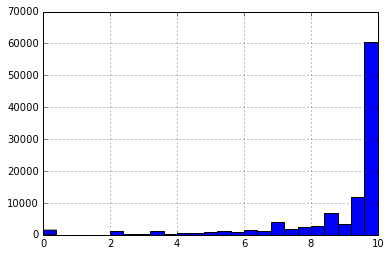

In [22]:
df_Assignment_Event.Grade.hist(bins=25)

In [23]:
df_Assignment_Event.ProblemID.value_counts()

6     19138
7     18457
12    17002
14    15677
5     14778
17    10122
20     9929
1        13
4        11
2         8
3         1
Name: ProblemID, dtype: int64

In [24]:
# removes 1234 which seem to be fake homeworks for testing
print(df_Assignment_Event.shape)
df_Assignment_Event = df_Assignment_Event[df_Assignment_Event.ProblemID>4]
print(df_Assignment_Event.shape)

(105136, 6)
(105103, 6)


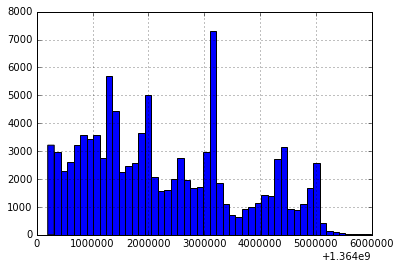

In [25]:
df_Assignment_Event[df_Assignment_Event.TimeStamp<1.37e9].TimeStamp.hist(bins=50)

In [26]:
df_Assignment_Event_sorted = df_Assignment_Event.sort_values(by=['SessionUserID','TimeStamp'])
df_Assignment_Event_sorted.head(10)

,SessionUserID,Grade,TimeStamp,ProblemID,EventType,Date
51797,000203e26d8ff4c482703c1c40e211b23c7a926c,10.00,1364714776,5,Problem.Check,2013-03-31 07:26:16
81943,000203e26d8ff4c482703c1c40e211b23c7a926c,10.00,1364757231,7,Problem.Check,2013-03-31 19:13:51
80686,000203e26d8ff4c482703c1c40e211b23c7a926c,10.00,1365435360,6,Problem.Check,2013-04-08 15:36:00
596,000203e26d8ff4c482703c1c40e211b23c7a926c,7.09,1365987021,12,Problem.Check,2013-04-15 00:50:21
19318,000203e26d8ff4c482703c1c40e211b23c7a926c,10.00,1365987773,12,Problem.Check,2013-04-15 01:02:53
74191,000203e26d8ff4c482703c1c40e211b23c7a926c,8.36,1366581976,14,Problem.Check,2013-04-21 22:06:16
82979,000203e26d8ff4c482703c1c40e211b23c7a926c,10.00,1366584864,14,Problem.Check,2013-04-21 22:54:24
63007,000203e26d8ff4c482703c1c40e211b23c7a926c,10.00,1368392652,17,Problem.Check,2013-05-12 21:04:12
43177,000203e26d8ff4c482703c1c40e211b23c7a926c,9.65,1368994845,20,Problem.Check,2013-05-19 20:20:45
23637,000203e26d8ff4c482703c1c40e211b23c7a926c,10.00,1368995671,20,Problem.Check,2013-05-19 20:34:31


In [27]:
# The index has gone crazy, useless, but we can reset it !
df_Assignment_Event_sorted.reset_index(drop=True, inplace=True)
df_Assignment_Event_sorted.head(10)

,SessionUserID,Grade,TimeStamp,ProblemID,EventType,Date
0,000203e26d8ff4c482703c1c40e211b23c7a926c,10.00,1364714776,5,Problem.Check,2013-03-31 07:26:16
1,000203e26d8ff4c482703c1c40e211b23c7a926c,10.00,1364757231,7,Problem.Check,2013-03-31 19:13:51
2,000203e26d8ff4c482703c1c40e211b23c7a926c,10.00,1365435360,6,Problem.Check,2013-04-08 15:36:00
3,000203e26d8ff4c482703c1c40e211b23c7a926c,7.09,1365987021,12,Problem.Check,2013-04-15 00:50:21
4,000203e26d8ff4c482703c1c40e211b23c7a926c,10.00,1365987773,12,Problem.Check,2013-04-15 01:02:53
5,000203e26d8ff4c482703c1c40e211b23c7a926c,8.36,1366581976,14,Problem.Check,2013-04-21 22:06:16
6,000203e26d8ff4c482703c1c40e211b23c7a926c,10.00,1366584864,14,Problem.Check,2013-04-21 22:54:24
7,000203e26d8ff4c482703c1c40e211b23c7a926c,10.00,1368392652,17,Problem.Check,2013-05-12 21:04:12
8,000203e26d8ff4c482703c1c40e211b23c7a926c,9.65,1368994845,20,Problem.Check,2013-05-19 20:20:45
9,000203e26d8ff4c482703c1c40e211b23c7a926c,10.00,1368995671,20,Problem.Check,2013-05-19 20:34:31


In [28]:
# found this here: 
# http://stackoverflow.com/questions/19530568/can-pandas-groupby-aggregate-into-a-list-rather-than-sum-mean-etc
# the big idea is to be able to manipulate the tuples with something like apply(func) later on.
df_Assignment_Event_sorted.groupby(['SessionUserID','ProblemID']).agg(lambda x: tuple(x)).head(19)

Grade  \
SessionUserID                            ProblemID                          
000203e26d8ff4c482703c1c40e211b23c7a926c 5                        (10.0,)   
                                         6                        (10.0,)   
                                         7                        (10.0,)   
                                         12         (7.09000015259, 10.0)   
                                         14         (8.35999965668, 10.0)   
                                         17                       (10.0,)   
                                         20         (9.64999961853, 10.0)   
0007e260cf0c116c93abc29af27ce465356f6359 6                        (10.0,)   
                                         7                        (10.0,)   
0009b5effbafb95aacddc2f356f20b3d3294d3ba 7               (9.97999954224,)   
001182ce17207806e07c249602a679a35bcf454d 5                        (10.0,)   
                                         6                        (10.0,)   
                                         7                        (10.0,)   
                                         12         (9.96000003815, 10.0)   
                                         14                       (10.0,)   
                                         17         (9.53999996185, 10.0)   
                                         20         (9.30000019073, 10.0)   
001b69d1376c69a969d86e0bff96d9d6320d75ec 5          (9.97999954224, 10.0)   
                                         7                        (10.0,)   

                                                                   TimeStamp  \
SessionUserID                            ProblemID                             
000203e26d8ff4c482703c1c40e211b23c7a926c 5                     (1364714776,)   
                                         6                     (1365435360,)   
                                         7                     (1364757231,)   
                                         12         (1365987021, 1365987773)   
                                         14         (1366581976, 1366584864)   
                                         17                    (1368392652,)   
                                         20         (1368994845, 1368995671)   
0007e260cf0c116c93abc29af27ce465356f6359 6                     (1366086129,)   
                                         7                     (1364711553,)   
0009b5effbafb95aacddc2f356f20b3d3294d3ba 7                     (1365363836,)   
001182ce17207806e07c249602a679a35bcf454d 5                     (1365183457,)   
                                         6                     (1365702959,)   
                                         7                     (1365207437,)   
                                         12         (1366505245, 1366506334)   
                                         14                    (1367070047,)   
                                         17         (1368284254, 1368285035)   
                                         20         (1368831056, 1368832424)   
001b69d1376c69a969d86e0bff96d9d6320d75ec 5          (1365325506, 1365326192)   
                                         7                     (1365334060,)   

                                                                         EventType  \
SessionUserID                            ProblemID                                   
000203e26d8ff4c482703c1c40e211b23c7a926c 5                        (Problem.Check,)   
                                         6                        (Problem.Check,)   
                                         7                        (Problem.Check,)   
                                         12         (Problem.Check, Problem.Check)   
                                         14         (Problem.Check, Problem.Check)   
                                         17                       (Problem.Check,)   
                                         20         (Problem.Check, Problem.Check

### Video Events

In [29]:
# Need to make sense out of these event types
df_Video_Event.EventType.value_counts()

Video.Seek           749845
Video.Load           698560
Video.Play           634870
Video.Pause          587093
Video.Download       487168
Video.SpeedChange    231622
Video.Stalled         56908
Video.Error           25600
Name: EventType, dtype: int64

In [30]:
counts = df_Video_Event.SessionUserID.value_counts()
print("Average number of video event per student: %f" % counts.mean())
counts.head(10)

Average number of video event per student: 112.322570


a643162af0e4d07de09c5bc76b80ff85ee5e3c71    14570
c05643d667c2c929d64d6d19cd30c1965af3b347    10590
a88bbe0f2adc974e121b2c0bf175871d67725236     8929
5cd101d3f9dab3734f30e7ddc944f6e76f0c180b     7060
8b56ed53097ae9c28609816317c58a2c42937b15     6037
0d36640b1e7b7d895919f9249aec534a903e3f61     5177
5981f81f756f9aa5a681b954a28acc551ace67b5     4587
4cac97ae974fdb79e6614ecc8b13a7de9e606716     4517
3734f39acccc6f6c9435fb41d64a8a651668e718     4061
c7f421b1b044a441f37fceb4ddf6e7e33ce7a7c8     4037
Name: SessionUserID, dtype: int64

[  1   2   3   4   5   6   7   8  14  15  16  17  18  19  20  21  22  23
  24  25  26  27  28  29  30  33  34  35  36  37  38  39  40  41  42  43
  44  47  48  49  50  51  52  53  54  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128]


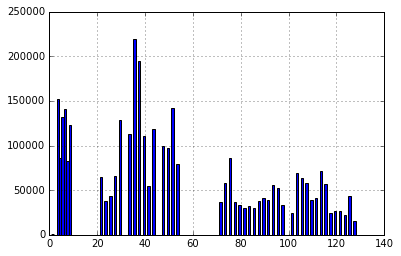

In [31]:
VideoIdList = df_Video_Event.VideoID.unique()
VideoIdList.sort()
print(VideoIdList)
bins = range(df_Video_Event.VideoID.min(),df_Video_Event.VideoID.max()+1)
df_Video_Event.VideoID.hist(bins=bins)

In [32]:
df_Video_Event_sorted = df_Video_Event.sort_values(by=['SessionUserID','TimeStamp'])
df_Video_Event_sorted.reset_index(drop=True, inplace=True)
df_Video_Event_sorted.head(5)

,SessionUserID,TimeStamp,VideoID,EventType,Date
0,000203e26d8ff4c482703c1c40e211b23c7a926c,1364251130,27,Video.Load,2013-03-25 22:38:50
1,000203e26d8ff4c482703c1c40e211b23c7a926c,1364251640,27,Video.Load,2013-03-25 22:47:20
2,000203e26d8ff4c482703c1c40e211b23c7a926c,1364251777,8,Video.Load,2013-03-25 22:49:37
3,000203e26d8ff4c482703c1c40e211b23c7a926c,1364408481,21,Video.Load,2013-03-27 18:21:21
4,000203e26d8ff4c482703c1c40e211b23c7a926c,1364408483,21,Video.Play,2013-03-27 18:21:23


### All Events

In [33]:
df_All_Event_sorted = df_All_Event.sort_values(by=['SessionUserID','TimeStamp'])
df_All_Event_sorted.reset_index(drop=True, inplace=True)
df_All_Event_sorted.head(10)

,Date,EventType,Grade,ProblemID,SessionUserID,TimeStamp,VideoID,EventTypeMain,EventTypeDetail
0,2013-03-25 22:38:50,Video.Load,NaN,NaN,000203e26d8ff4c482703c1c40e211b23c7a926c,1364251130,27.0,Video,Load
1,2013-03-25 22:47:20,Video.Load,NaN,NaN,000203e26d8ff4c482703c1c40e211b23c7a926c,1364251640,27.0,Video,Load
2,2013-03-25 22:49:37,Video.Load,NaN,NaN,000203e26d8ff4c482703c1c40e211b23c7a926c,1364251777,8.0,Video,Load
3,2013-03-27 18:21:21,Video.Load,NaN,NaN,000203e26d8ff4c482703c1c40e211b23c7a926c,1364408481,21.0,Video,Load
4,2013-03-27 18:21:23,Video.Play,NaN,NaN,000203e26d8ff4c482703c1c40e211b23c7a926c,1364408483,21.0,Video,Play
5,2013-03-27 18:21:23,Video.SpeedChange,NaN,NaN,000203e26d8ff4c482703c1c40e211b23c7a926c,1364408483,21.0,Video,SpeedChange
6,2013-03-27 18:21:24,Video.Pause,NaN,NaN,000203e26d8ff4c482703c1c40e211b23c7a926c,1364408484,21.0,Video,Pause
7,2013-03-27 18:21:27,Video.Load,NaN,NaN,000203e26d8ff4c482703c1c40e211b23c7a926c,1364408487,21.0,Video,Load
8,2013-03-27 18:21:28,Video.Play,NaN,NaN,000203e26d8ff4c482703c1c40e211b23c7a926c,1364408488,21.0,Video,Play
9,2013-03-27 18:21:28,Video.SpeedChange,NaN,NaN,000203e26d8ff4c482703c1c40e211b23c7a926c,1364408488,21.0,Video,SpeedChange


In [34]:
# found this here: 
# http://stackoverflow.com/questions/19530568/can-pandas-groupby-aggregate-into-a-list-rather-than-sum-mean-etc
# the big idea is to be able to manipulate the tuples with something like apply(func) later on.
df_All_Event_sorted.groupby(['SessionUserID']).agg(lambda x: tuple(x)).head(50)
# That takes long time and I have no idea how to manipulate it afterward

,Date,EventType,Grade,ProblemID,TimeStamp,VideoID,EventTypeMain,EventTypeDetail
SessionUserID,,,,,,,,
000203e26d8ff4c482703c1c40e211b23c7a926c,"(2013-03-25 22:38:50, 2013-03-25 22:47:20, 201...","(Video.Load, Video.Load, Video.Load, Video.Loa...","(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","(1364251130, 1364251640, 1364251777, 136440848...","(27.0, 27.0, 8.0, 21.0, 21.0, 21.0, 21.0, 21.0...","(Video, Video, Video, Video, Video, Video, Vid...","(Load, Load, Load, Load, Play, SpeedChange, Pa..."
00055af5d64cad80211e625d70372203ef86039c,"(2013-04-08 22:35:22, 2013-04-08 22:38:13, 201...","(Video.Load, Video.Load, Video.Load, Video.Loa...","(nan, nan, nan, nan, nan, nan)","(nan, nan, nan, nan, nan, nan)","(1365460522, 1365460693, 1365462855, 138628842...","(27.0, 21.0, 8.0, 27.0, 8.0, 8.0)","(Video, Video, Video, Video, Video, Video)","(Load, Load, Load, Load, Load, Load)"
00068e57e0bda77bcd83a477b7427ec330975aaa,"(2013-03-26 07:36:03, 2013-03-26 07:39:33, 201...","(Video.Load, Video.Load, Video.Load, Video.Loa...","(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","(1364283363, 1364283573, 1364286523, 136445617...","(27.0, 21.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0...","(Video, Video, Video, Video, Video, Video, Vid...","(Load, Load, Load, Load, Play, Stalled, Error,..."
0007e260cf0c116c93abc29af27ce465356f6359,"(2013-03-26 00:11:32, 2013-03-26 00:39:32, 201...","(Video.Load, Video.Load, Video.Load, Video.Loa...","(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","(1364256692, 1364258372, 1364258382, 136443203...","(8.0, 29.0, 8.0, 29.0, 29.0, 29.0, 29.0, 29.0,...","(Video, Video, Video, Video, Video, Video, Vid...","(Load, Load, Load, Load, Play, Load, Play, See..."
0009b5effbafb95aacddc2f356f20b3d3294d3ba,"(2013-03-25 22:57:38, 2013-03-25 23:17:48, 201...","(Video.Load, Video.Load, Video.Load, Video.Loa...","(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","(1364252258, 1364253468, 1364253657, 136425556...","(27.0, 27.0, 21.0, 21.0, 21.0, 29.0, 8.0, 3.0,...","(Video, Video, Video, Video, Video, Video, Vid...","(Load, Load, Load, Load, Load, Download, Downl..."
000cd0256d0dc734c79412ea0cae1630cd2a1023,"(2013-05-14 01:55:40, 2013-05-14 01:55:41, 201...","(Video.Load, Video.Play, Video.SpeedChange, Vi...","(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","(1368496540, 1368496541, 1368496573, 136849662...","(27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27....","(Video, Video, Video, Video, Video, Video, Vid...","(Load, Play, SpeedChange, Pause, Play, SpeedCh..."
0010ecf90d9435c4589395ade6f08ed7ec5e3720,"(2013-03-26 22:02:20, 2013-03-26 22:03:41, 201...","(Video.Load, Video.Load, Video.Load, Video.Dow...","(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","(1364335340, 1364335421, 1364365666, 136436569...","(27.0, 8.0, 27.0, 27.0, 23.0, 27.0, 25.0, 29.0...","(Video, Video, Video, Video, Video, Video, Vid...","(Load, Load, Load, Download, Download, Downloa..."
001182ce17207806e07c249602a679a35bcf454d,"(2013-04-02 11:21:11, 2013-04-02 11:21:13, 201...","(Video.Load, Video.Play, Video.Load, Video.Loa...","(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","(1364901671, 1364901673, 1365172682, 136517268...","(27.0, 27.0, 27.0, 27.0, 8.0, 8.0, 8.0, 3.0, 3...","(Video, Video, Video, Video, Video, Video, Vid...","(Load, Play, Load, Load, Load, Pause, Seek, Lo..."
001b69d1376c69a969d86e0bff96d9d6320d75ec,"(2013-03-25 09:06:03, 2013-03-25 09:08:53, 201...","(Video.Load, Video.Load, Video.Load, Video.Loa...","(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","(1364202363, 1364202533, 1364202585, 136420259...","(27.0, 23.0, 2